<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><span style="float:right;"><a href="./312_fire_siberia_2019.ipynb">312 - Siberian fires 2019 >></a></span>

<div class="alert alert-block alert-warning">
<b>30 - CASE STUDIES - FIRE</b></div>

<div class="alert alert-block alert-warning">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** modules are prerequisites:
- [211 - Metop-A GOME-2 - Tropospheric NO<sub>2</sub> - Level 2 - Load and browse](../20_data_discovery/211_Metop-A_GOME-2_NO2Tropo_L2_load_browse.ipynb)
- [212 -Metop-AB GOME-2 - Tropospheric NO<sub>2</sub> - Level 2 - Pre-processing](../20_data_discovery/212_Metop-AB_GOME-2_NO2Tropo_L2_preprocess.ipynb)
- [241 - Sentinel-5P TROPOMI - Carbon Monoxide - Level 2 - Load and browse](../20_data_discovery/241_Sentinel-5P_TROPOMI_CO_L2_load_browse.ipynb)

It is recommended to go through these modules before you start with this module.
</div>

<hr>

# 3.1.1 Discover Amazon Fires 2019

Metop-AB GOME-2 Level 2 and Copernicus Sentinel-5P data are helpful to track and monitor inputs to the atmosphere from various trace gases.

We investigate two case studies:
* **[1) Case study - Amazonian fires and the spread of HCHO in August 2019](#amazon_fires)**
 * [1.1 - Load Metop-AB GOME-2 HCHO Level 2 data for 19 and 22 August 2019](#amazon_fires_1)
 * [1.2 - Plot Metop-AB GOME-2 HCHO Level 2 data - Mollweide projection](#amazon_fires_2)
 * [1.3 - Generate a geographical subset over South America and plot the subset](#amazon_fires_3)
 * [1.4 - Integrate with Sentinel-5P TROPOMI CO data](#amazon_fires_4)
 
 
* **[2) Case study - Canada / US fires in August 2018](#us_fires)**
 * [2.1 - Generate a geographical subset of a masked Metop-A and Metop-B combined dataset](#us_fires_1)
 * [2.2 - Plot the three geographical subsets in one row](#us_fires_2)
 * [2.3 - Integrate with Sentinel-5P CO data](#us_fires_3)

<hr>

#### Load required libraries

In [79]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [80]:
%run ../functions.ipynb


<hr>

## <a id="amazon_fires"></a>1) Case study -  Amazonian fires and the spread of `HCHO` in August 2019

Satellite data show the large input to atmosphere due to Amazonian fires. GOME-2 is capable to measure the total amount of `Formaldehyde (HCHO)` over a specific pixel. Nevertheless, since `HCHO` is concentrated close to surface, due to its volatility and reactivity, these observations are indicatives of the location and intensity of the sources.

`HCHO` is a precursor (e.g. serves as basis for multiple reactions including ones producing tropospheric ozone) and is considered harmful due to its toxicity and volatility.
`HCHO` is produced both by synthesis and natural reactions. [Biomass burning](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/1999GL900156) is considered to be a significant organic source of `HCHO`.

Formaldehyde can be monitored from the GOME-2 instrument onboard Metop-B. Let's monitor Formaldehyde between 19 August and 22 August 2019.

### <a id="amazon_fires_1"></a>1) Load Metop-AB GOME-2 `HCHO` Level 2 data for 19 and 22 August 2019

Define general variables that facilitate the loading of the data.

In [119]:
parameter='HCHO'
latName = 'GEOLOCATION/LatitudeCentre'
lonName = 'GEOLOCATION/LongitudeCentre'

longname='Vertical column density of ' + parameter
unit='mol/cm2'
name='vertical_column_' + parameter

latmin = -60
latmax = 15
lonmin = -100
lonmax = 80

Load masked `HCHO` data with the help of [load_masked_l2_da](../functions.ipynb#load_masked_l2_da) function. The function loads both, the parameter and cloud cover information as xarray and masks out all pixels with a cloud cover beyond a given threshold. 
Do it for the 19 August and subsequently for 22 August 2019.

In [82]:
day1 = '19'
directory_2a= '../eodata/gome2/offline/2a/2019/08/'+day1+'/'
directory_2b= '../eodata/gome2/offline/2b/2019/08/'+day1+'/'

gome_2a_1 = load_masked_l2_da(directory=directory_2a,
                              internal_filepath='TOTAL_COLUMNS',
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName,
                              no_of_dims=1,
                              paramname=parameter,
                              longname=longname,
                              unit=unit,
                              threshold=0.3,
                              operator='<')

gome_2b_1 = load_masked_l2_da(directory=directory_2b,
                              internal_filepath='TOTAL_COLUMNS',
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName,
                              no_of_dims=1,
                              paramname=parameter,
                              longname=longname,
                              unit=unit,
                              threshold=0.3,
                              operator='<')

ab_da_masked_1 = xr.concat([gome_2a_1, gome_2b_1], dim='ground_pixel')
ab_da_masked_1

<xarray.DataArray (ground_pixel: 422800)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 62.7 63.02 63.34 ... -67.45 -67.8 -68.14
    longitude  (ground_pixel) float32 66.66 66.31 65.95 ... 82.51 82.35 82.19
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

In [83]:
day2 = '22'
directory_2a= '../eodata/gome2/offline/2a/2019/08/'+day2+'/'
directory_2b= '../eodata/gome2/offline/2b/2019/08/'+day2+'/'


gome_2a_2 = load_masked_l2_da(directory=directory_2a, 
                              internal_filepath='TOTAL_COLUMNS',
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName,
                              no_of_dims=1,
                              paramname=parameter,
                              longname=longname,
                              unit=unit,
                              threshold=0.3,
                              operator='<')
gome_2b_2 = load_masked_l2_da(directory=directory_2b,
                              internal_filepath='TOTAL_COLUMNS',
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName,
                              no_of_dims=1,
                              paramname='HCHO',
                              longname=longname,
                              unit=unit,
                              threshold=0.3,
                              operator='<')

ab_da_masked_2 = xr.concat([gome_2a_2, gome_2b_2], dim='ground_pixel')
ab_da_masked_2

<xarray.DataArray (ground_pixel: 437986)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 64.02 64.34 64.65 ... -68.65 -69.0 -69.34
    longitude  (ground_pixel) float32 339.4 339.1 338.7 ... 123.0 122.8 122.6
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

<br>

### <a id="amazon_fires_2"></a>2) Plot Metop-A/B GOME-2 `HCHO` Level 2 data - Mollweide projection

Let us plot `HCHO` data for 19 August 2019. You see elevated `HCHO` values in East Brazil, over the region where the Amazonas fires occured. You can use the function [visualize_scatter](../functions.ipynb#visualize_scatter) to visualize the data.

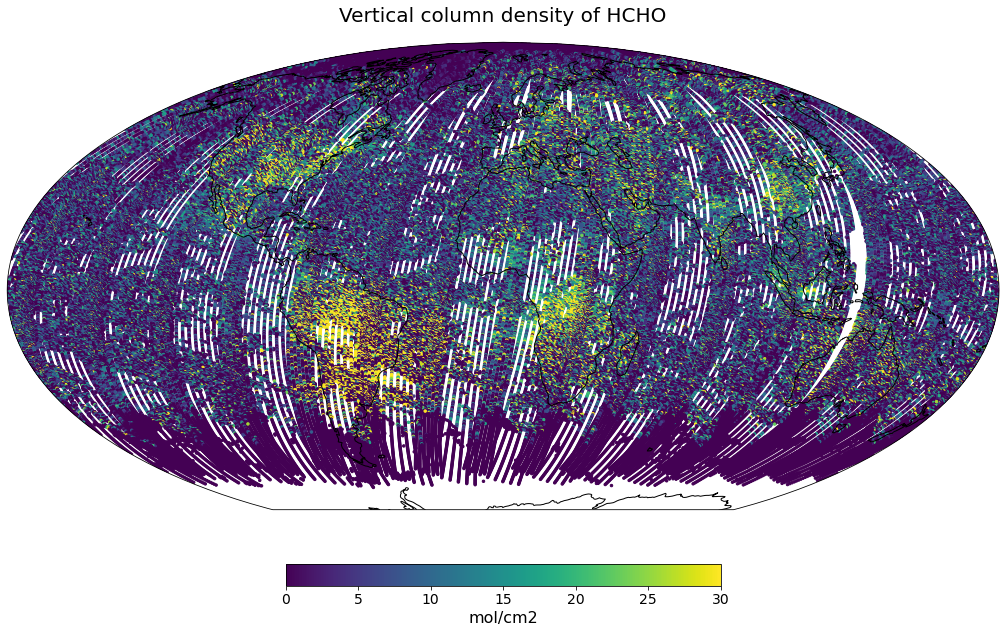

In [84]:
visualize_scatter(xr_dataarray=ab_da_masked_1, 
                  conversion_factor=1e-15, 
                  projection=ccrs.Mollweide(),
                  vmin=0,
                  vmax=30,
                  point_size=6,
                  color_scale='viridis',
                  unit=unit,
                  title=ab_da_masked_1.long_name)

<br>

### <a id="amazon_fires_3"></a>3) Generate a geographical subset over South America and plot the subset

Generate a geographical subset for 19 August 2019, with the help of the [generate_geographical_subset](../functions.ipynb#generate_geographical_subset) function. Before you can geographically subset the data, you have to assign the longitude coordinates to a [-180,180] grid, as per default the GOME-2 longitude coordinates are on a [0,360] grid.

In [120]:
ab_da_masked_1_assigned = ab_da_masked_1.assign_coords(longitude=(((ab_da_masked_1.longitude + 180) % 360) - 180))
ab_da_subset_1 = generate_geographical_subset(xarray=ab_da_masked_1_assigned, 
                                              latmin=latmin, 
                                              latmax=latmax, 
                                              lonmin=lonmin, 
                                              lonmax=lonmax)
ab_da_subset_1

<xarray.DataArray (ground_pixel: 96033)>
array([1.5094939e+16,           nan,           nan, ...,           nan,
                 nan,           nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 14.84 14.66 14.66 ... -58.41 -59.58 -59.9
    longitude  (ground_pixel) float32 -90.88 -90.18 -90.24 ... 61.53 64.3 63.98
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

<br>

Generate a geographical subset for 22 August 2019.

In [121]:
ab_da_masked_2_assigned = ab_da_masked_2.assign_coords(longitude=(((ab_da_masked_2.longitude + 180) % 360) - 180))
ab_da_subset_2 = generate_geographical_subset(xarray=ab_da_masked_2_assigned, 
                                              latmin=latmin, 
                                              latmax=latmax, 
                                              lonmin=lonmin, 
                                              lonmax=lonmax)
ab_da_subset_2

<xarray.DataArray (ground_pixel: 96670)>
array([nan, nan, nan, ..., nan, -1., -1.], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 14.68 14.68 14.33 ... -59.05 -58.69 -58.31
    longitude  (ground_pixel) float32 -99.84 -99.9 -99.93 ... -0.7037 -1.905
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

<br>

Set some global variables that facilitate plotting and then plot both days next to each other.

In [115]:
day1 = '20190819'
day2 = '20190822'
conversion_factor = 1e-15
color_scale = 'viridis'
vmin = 0
vmax = 25

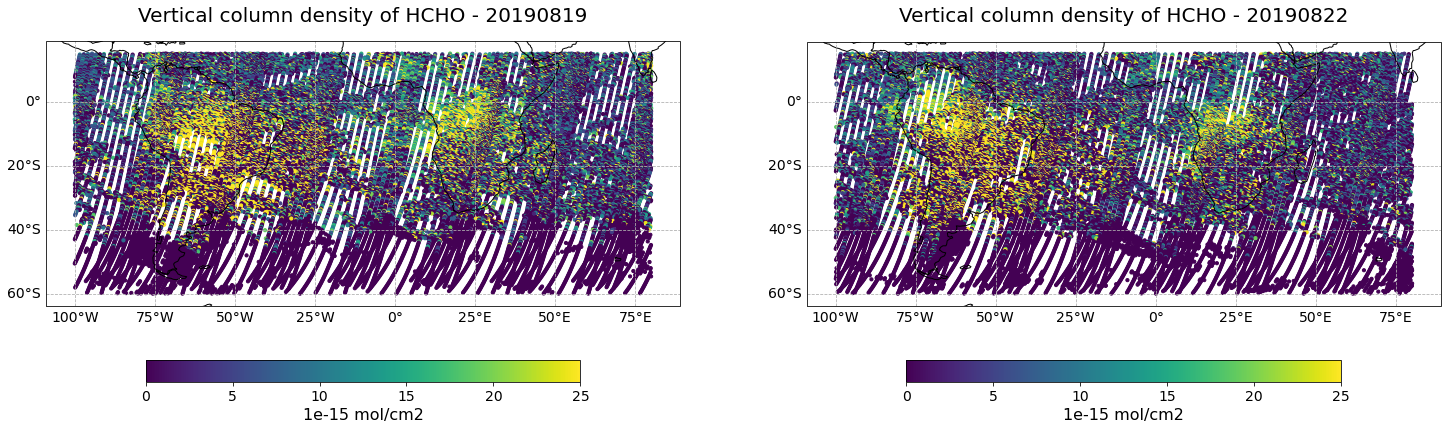

In [122]:
fig = plt.figure(figsize=(25,10))

#################################
# First subplot
#################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img1 = ax1.scatter(
    ab_da_subset_1.longitude.data,
    ab_da_subset_1.latitude.data,
    c=ab_da_subset_1.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=10,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + ab_da_subset_1.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(ab_da_subset_1.long_name + ' - ' + day1, fontsize=20, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img2 = ax2.scatter(
    ab_da_subset_2.longitude.data,
    ab_da_subset_2.latitude.data,
    c=ab_da_subset_2.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=10,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + ab_da_subset_2.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(ab_da_subset_2.long_name + ' - ' + day2, fontsize=20, pad=20.0)

plt.show()

<br>

<br>

### 4) <a id="amazon_fires_4"></a>Integrate with Sentinel-5P `Carbon Monoxide (CO)` data

Load `Sentinel-5P CO` data for 19 and 22 August 2019, select the `carbonmonomxide_total_column` variable and convert the data from `mol per m2` to `molecules per cm2`.

In [89]:
s5p_mf_19 = xr.open_mfdataset('../eodata/sentinel5p/co/2019/08/19/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_19

co_19 = s5p_mf_19.carbonmonoxide_total_column[0,:,:]
co_19_converted = co_19*co_19.multiplication_factor_to_convert_to_molecules_percm2


lat_19 = co_19.latitude
lon_19 = co_19.longitude

In [90]:
s5p_mf_22 = xr.open_mfdataset('../eodata/sentinel5p/co/2019/08/22/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_22

co_22 = s5p_mf_22.carbonmonoxide_total_column[0,:,:]
co_22_converted = co_22*co_22.multiplication_factor_to_convert_to_molecules_percm2

lat_22 = co_22.latitude
lon_22 = co_22.longitude

<br>

Next step is to visualize both `DataArrays` in one row, with `subplot` and matplotlib's `pcolormesh` function.

In [91]:
lonmin=-100
lonmax=0
latmin=-80
latmax=40

color_scale = 'viridis'
vmin=0
vmax=6

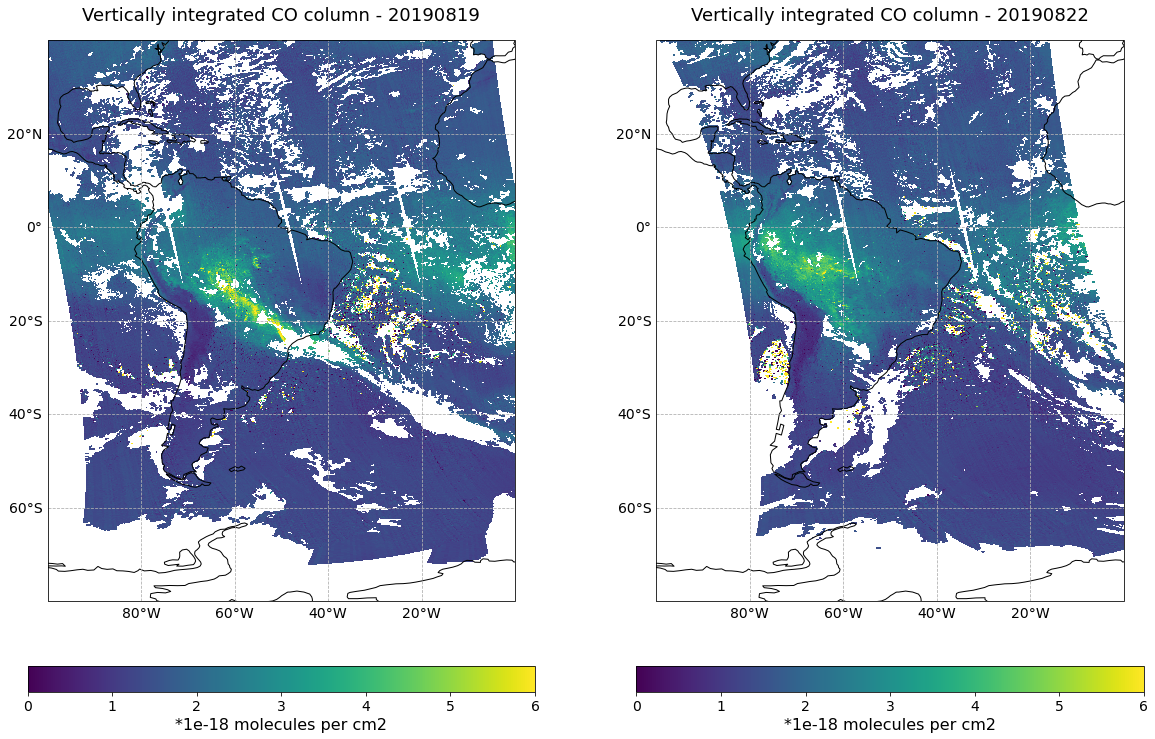

In [92]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs

fig=plt.figure(figsize=(20, 12))

################################
# Start of first subplot
################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img1 = plt.pcolormesh(lon_19, 
                      lat_19, 
                      co_19_converted.data*1e-18,
                      cmap=color_scale, 
                      transform=ccrs.PlateCarree(),
                      vmin=vmin, 
                      vmax=vmax)
ax1.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('*1e-18 molecules per cm2', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(co_19.long_name + ' - ' + day1, fontsize=18, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img2 = plt.pcolormesh(lon_22, 
                      lat_22, 
                      co_22_converted.data*1e-18,
                      cmap=color_scale, 
                      transform=ccrs.PlateCarree(), 
                      vmin=vmin, 
                      vmax=vmax)
ax2.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('*1e-18 molecules per cm2', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(co_22.long_name + ' - ' + day2, fontsize=18, pad=20.0)

plt.show()

<br>

## <a id="us_fires"></a>2) Case study - Canada / US fires in August 2018

Between 13-18 August 2018, smoke from wildfires in western US and Canada moved across the US and reached the eastern US, including New England, on 16-17 Aug 2018. `Particulate Matter 2.5` e.g. increased to warning color `Yellow (Moderate)` due to the smoke (much higher than normal).

Let us load AC SAF Level 2 `HCHO` data for three days (13, 16 and 18 August 2018) and compare the signal.

#### Define some general variables.

In [134]:
day1 = '20180813'
day2 = '20180816'
day3 = '20180818'

latmin=20
latmax=61
lonmin=-160
lonmax=-50

parameter='HCHO'
conversion_factor = 1e-15
color_scale='viridis'

longname='Vertical column density of ' + parameter
unit='mol/cm2'
name='vertical_column_ ' + parameter

vmin=0
vmax=20

<br>

### <a id="us_fires_1"></a>1) Generate a geographical subset of a masked Metop-A and Metop-B combined dataset

Load the data for the three days. For each day, we load the masked parameter with the function [load_masked_l2_da](../functions.ipynb#load_masked_l2_da), combine Metop-A and Metop-B data with xarray's function `xr.concat` generate a geographical subset that covers Canada and US with the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset).

#### Load the data for 13 August 2018

In [135]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/13/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/13/'

latName='GEOLOCATION/LatitudeCentre'
lonName='GEOLOCATION/LongitudeCentre'

hcho_2b_13 = load_masked_l2_da(directory=directory_2b,
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              no_of_dims=1, 
                              paramname=parameter, 
                              longname=longname, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_2a_13 = load_masked_l2_da(directory=directory_2a, 
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              longname=longname, 
                              paramname=parameter, 
                              no_of_dims=1, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_ab_concat_13 =  xr.concat([hcho_2b_13, hcho_2a_13], dim='ground_pixel')

hcho_ab_13_subset = generate_geographical_subset(xarray=hcho_ab_concat_13, 
                                                latmin=latmin,
                                                latmax=latmax,
                                                lonmin=lonmin,
                                                lonmax=lonmax,
                                                reassign=True)
hcho_ab_13_subset

<xarray.DataArray (ground_pixel: 34301)>
array([           nan,            nan,            nan, ...,
       -8.0786091e+15,  1.4603419e+16,  5.4665082e+15], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 60.97 60.96 60.68 ... 20.29 20.35 20.25
    longitude  (ground_pixel) float32 -64.26 -65.42 -64.69 ... -64.98 -64.56
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

#### Load the data for 16 August 2018

In [136]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/16/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/16/'

hcho_2b_16 = load_masked_l2_da(directory=directory_2b, 
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              no_of_dims=1, 
                              paramname=parameter, 
                              longname=longname, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_2a_16 = load_masked_l2_da(directory=directory_2a,
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              longname=longname, 
                              paramname=parameter, 
                              no_of_dims=1, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_ab_concat_16 =  xr.concat([hcho_2b_16, hcho_2a_16], dim='ground_pixel')

hcho_ab_16_subset = generate_geographical_subset(xarray=hcho_ab_concat_16, 
                                                latmin=latmin,
                                                latmax=latmax,
                                                lonmin=lonmin,
                                                lonmax=lonmax,
                                                reassign=True)
hcho_ab_16_subset

<xarray.DataArray (ground_pixel: 32492)>
array([           nan, -1.3459625e+15,            nan, ...,
                  nan,            nan,  1.4113878e+16], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 60.82 60.8 60.53 60.92 ... 20.04 20.1 20.0
    longitude  (ground_pixel) float32 -124.8 -125.9 -125.2 ... -150.7 -150.2
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

#### Load the data for 18 August 2018

In [138]:
directory_2b= '../eodata/gome2/offline/2b/2018/08/18/'
directory_2a= '../eodata/gome2/offline/2a/2018/08/18/'

hcho_2b_18 = load_masked_l2_da(directory=directory_2b,
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              no_of_dims=1, 
                              paramname=parameter, 
                              longname=longname, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_2a_18 = load_masked_l2_da(directory=directory_2a, 
                              internal_filepath='TOTAL_COLUMNS', 
                              parameter=parameter, 
                              lat_path=latName, 
                              lon_path=lonName, 
                              no_of_dims=1, 
                              paramname=parameter, 
                              longname=longname, 
                              unit=unit, 
                              threshold=0.3, 
                              operator='<')

hcho_ab_concat_18 =  xr.concat([hcho_2b_18, hcho_2a_18], dim='ground_pixel')

hcho_ab_18_subset = generate_geographical_subset(xarray=hcho_ab_concat_18, 
                                                latmin=latmin,
                                                latmax=latmax,
                                                lonmin=lonmin,
                                                lonmax=lonmax,
                                                reassign=True)
hcho_ab_18_subset

<xarray.DataArray (ground_pixel: 33552)>
array([           nan,            nan,            nan, ...,
       -7.6504959e+15, -1.0227101e+16,            nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 60.9 60.88 60.61 ... 20.29 20.04 20.04
    longitude  (ground_pixel) float32 -63.5 -64.65 -63.94 ... -87.79 -89.52
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Vertical column density of HCHO
    units:      mol/cm2

<br>

### <a id="us_fires_2"></a>2) Plot the three geographical subsets in one row

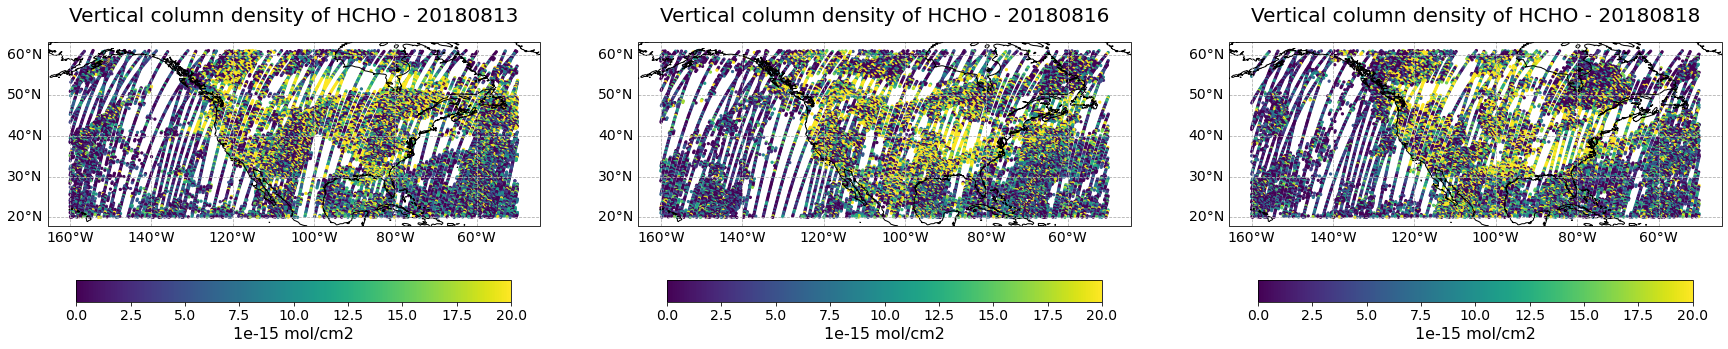

In [139]:
fig = plt.figure(figsize=(30,10))

#################################
# First subplot
##################################
ax1 = plt.subplot(1,3,1, projection=ccrs.PlateCarree())
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img1 = ax1.scatter(
    hcho_ab_13_subset.longitude.data,
    hcho_ab_13_subset.latitude.data,
    c=hcho_ab_13_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + hcho_ab_13_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(hcho_ab_13_subset.long_name + ' - ' + day1, fontsize=20, pad=20.0)

#################################
# Second subplot
##################################
ax2 = plt.subplot(1,3,2, projection=ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img2 = ax2.scatter(
    hcho_ab_16_subset.longitude.data,
    hcho_ab_16_subset.latitude.data,
    c=hcho_ab_16_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + hcho_ab_16_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(hcho_ab_16_subset.long_name + ' - ' + day2, fontsize=20, pad=20.0)

#################################
# Third subplot
##################################
ax3 = plt.subplot(1,3,3, projection=ccrs.PlateCarree())
ax3.coastlines()

gl = ax3.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

img3 = ax3.scatter(
    hcho_ab_18_subset.longitude.data,
    hcho_ab_18_subset.latitude.data,
    c=hcho_ab_18_subset.data*conversion_factor,
    cmap=plt.cm.get_cmap(color_scale),
    marker='o',
    s=5,
    transform=ccrs.PlateCarree(),
    vmin=vmin,
    vmax=vmax
    )
cbar = fig.colorbar(img3, ax=ax3, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label(str(conversion_factor) + ' ' + hcho_ab_18_subset.units, fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax3.set_title(hcho_ab_18_subset.long_name + ' - ' + day3, fontsize=20, pad=20.0)

plt.show()

<br>

### 3) <a id='us_fires_3'></a>Integrate with Sentinel-5P `CO` data

Load `Sentinel-5P CO` data for 13 and 18 August 2018 and plot both data sets next to each other.

In [141]:
s5p_mf_13 = xr.open_mfdataset('../eodata/sentinel5p/co/2018/08/13/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_13

co_13 = s5p_mf_13.carbonmonoxide_total_column[0,:,:]
co_13_converted = co_13*co_13.multiplication_factor_to_convert_to_molecules_percm2

lat_13 = co_13.latitude
lon_13 = co_13.longitude

In [142]:
s5p_mf_16 = xr.open_mfdataset('../eodata/sentinel5p/co/2018/08/16/*.nc', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p_mf_16

co_16 = s5p_mf_16.carbonmonoxide_total_column[0,:,:]
co_16_converted = co_16*co_16.multiplication_factor_to_convert_to_molecules_percm2

lat_16 = co_16.latitude
lon_16 = co_16.longitude

<br>

Plot both `DataArrays` in one row, with `subplot`.

In [147]:
color_scale = 'viridis'
vmin=0
vmax=7

latmin=20
latmax=70
lonmin=-160
lonmax=-50

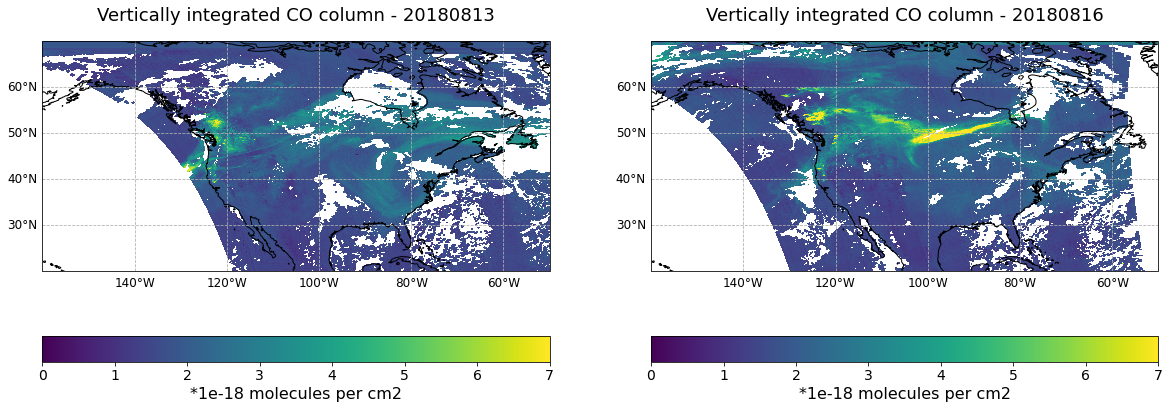

In [148]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs

fig=plt.figure(figsize=(20, 12))

################################
# Start of first subplot
################################
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img1 = plt.pcolormesh(lon_13, 
                      lat_13, 
                      co_13_converted.data*1e-18,
                      cmap=plt.get_cmap(color_scale), 
                      transform=ccrs.PlateCarree(), 
                      vmin=vmin, 
                      vmax=vmax)
ax1.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax1.coastlines()

gl = ax1.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}

cbar = fig.colorbar(img1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('*1e-18 molecules per cm2', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax1.set_title(co_13.long_name + ' - ' + day1, fontsize=18, pad=20.0)

################################
# Start of second subplot
################################
ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
img2 = plt.pcolormesh(lon_16, 
                      lat_16, 
                      co_16_converted.data*1e-18,
                      cmap=plt.get_cmap(color_scale), 
                      transform=ccrs.PlateCarree(),
                      vmin=vmin, 
                      vmax=vmax)
ax2.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
ax2.coastlines()

gl = ax2.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
    
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}

cbar = fig.colorbar(img2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('*1e-18 molecules per cm2', fontsize=16)
cbar.ax.tick_params(labelsize=14)
ax2.set_title(co_16.long_name + ' - ' + day2, fontsize=18, pad=20.0)

plt.show()

<br>

<a href="../00_index.ipynb"><< Index</a><span style="float:right;"><a href="./312_fire_siberia_2019.ipynb">312 - Siberian fires 2019 >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>